# Task 2
Author: **Saikiran Rudra**

# 2. Prediction using Unsupervised ML

### ❓ Problem Statement: From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually

In [1]:
# Importing Libraries

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import DBSCAN, KMeans

import itertools

In [2]:
# Reading Data

df = pd.read_csv("Iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
# Seperating Dependent and Independent Variables

df = df.drop(columns=["Id"])
X = df.loc[:, df.columns != "Species"]
y = df["Species"]

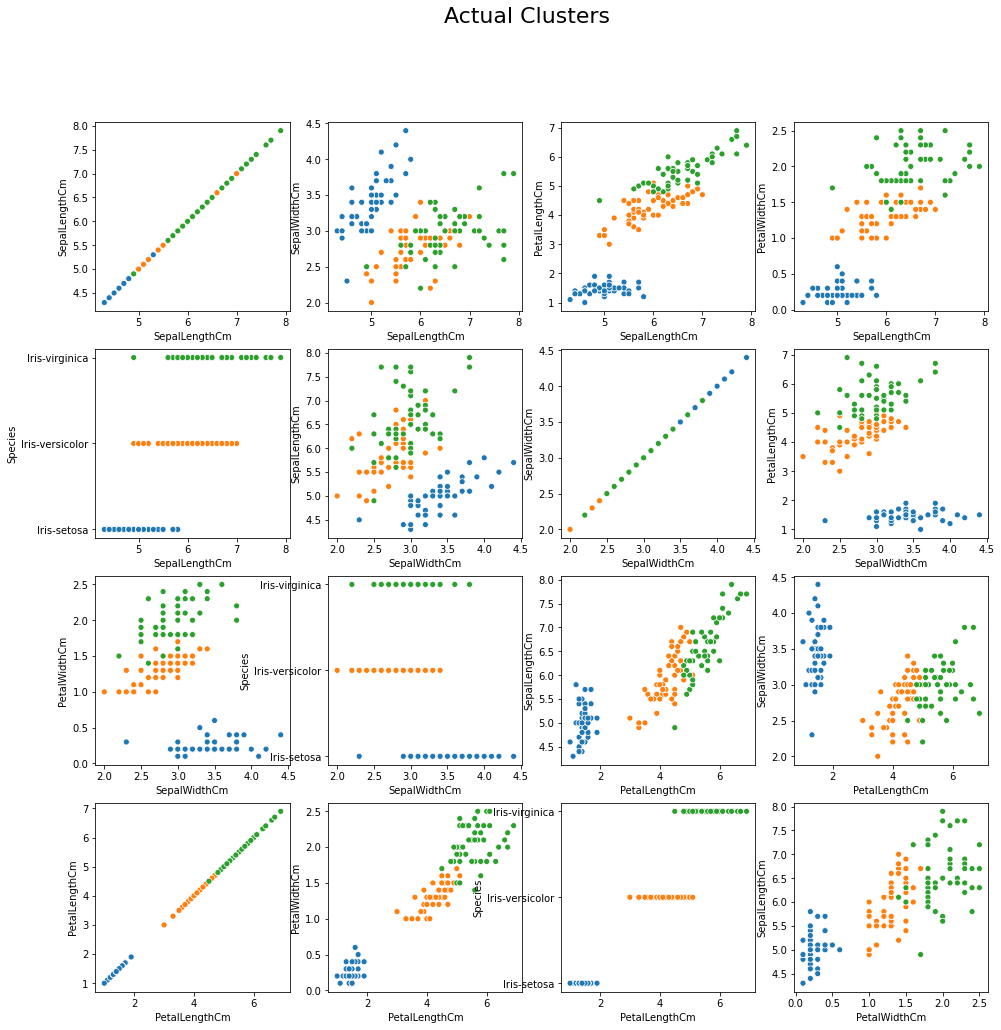

In [5]:
fig, ax = plt.subplots(4,4,figsize=(16,16))
fig.suptitle("Actual Clusters", fontsize=22)

combs = list(itertools.product(df.columns, df.columns))

counter = 0
for i in range(4):
    for j in range(4):
        sns.scatterplot(x=combs[counter][0], y=combs[counter][1], data=df, hue=y, ax=ax[i][j], legend=False)
        counter = counter + 1

## 🌟 Using DBSCAN for Clustring

In [6]:
db = DBSCAN(eps=1, min_samples=13).fit(X)

Text(0.5, 1.0, 'Actual Cluster')

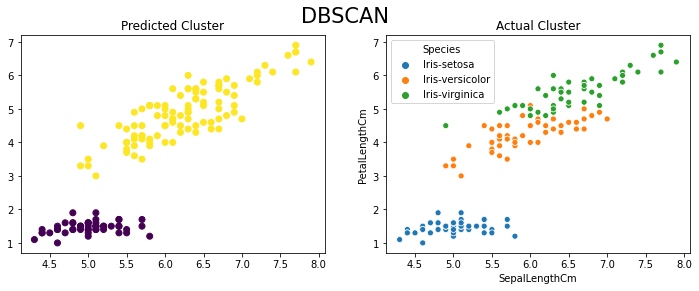

In [7]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.suptitle("DBSCAN", fontsize=21)

ax[0].scatter(df["SepalLengthCm"], df["PetalLengthCm"], c=db.labels_)
ax[0].set_title("Predicted Cluster")

sns.scatterplot(df["SepalLengthCm"], df["PetalLengthCm"], hue=y, ax=ax[1])
ax[1].set_title("Actual Cluster")

## 🌟 Using KMeans for Clustring

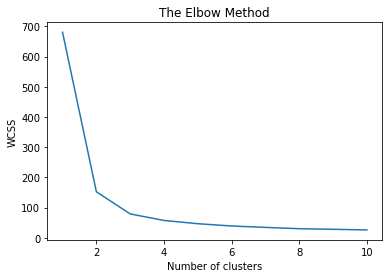

In [8]:
wcss = []
for i in range(1, 11):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [9]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
kmeans_labels = kmeans.fit_predict(X)

Text(0.5, 1.0, 'Actual Cluster')

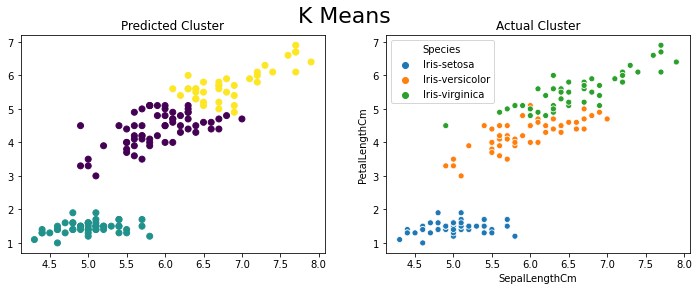

In [10]:
fig, ax = plt.subplots(1,2, figsize=(12,4))

fig.suptitle("K Means", fontsize=22)

ax[0].scatter(df["SepalLengthCm"], df["PetalLengthCm"], c=kmeans_labels)
ax[0].set_title("Predicted Cluster")

sns.scatterplot(df["SepalLengthCm"], df["PetalLengthCm"], hue=y, ax=ax[1])
ax[1].set_title("Actual Cluster")